# Capstone Project 2: Web Traffic Prediction 

## Project Statement:
Accurate forecasting of web traffic is crucial for effective resource allocation, capacity planning, and ensuring a seamless user experience. This project aims to develop a time series forecasting model to predict future web traffic based on historical data. The provided dataset “web traffic.csv” contains time-stamped web traffic counts, which will be used to analyze traffic patterns and build a predictive model. The student will implement the following steps:


#### Phase 1: Time Series Preprocessing and Exploration 
1.	Data Loading and Initial Inspection .
- a.	Load the “web traffic.csv” dataset into a panda’s DataFrame.
- b.	Convert the 'Timestamp' column to a datetime format.
- c.	Set the 'Timestamp' column as the index of the DataFrame.


In [439]:
#importing some importent librery 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings 
warnings.filterwarnings('ignore')

# Reading dataset
traffic = pd.read_csv('web_traffic.csv')

# Showing first ten rows of dataset
traffic

,Timestamp,TrafficCount
0,2020-01-20 00:00:00,487.0
1,2020-01-20 00:30:00,385.0
2,2020-01-20 01:30:00,269.0
3,2020-01-20 02:30:00,517.0
4,2020-01-20 03:30:00,129.0
...,...,...
2788,2020-05-17 08:30:00,521.0
2789,2020-05-17 09:30:00,1003.0
2790,2020-05-17 10:30:00,1442.0
2791,2020-05-17 11:30:00,1334.0


In [440]:
#basic Information
traffic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     2793 non-null   object 
 1   TrafficCount  2793 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.8+ KB


#### There are  no null value present in Time series dataframe.

In [441]:

traffic.describe().T

,count,mean,std,min,25%,50%,75%,max
TrafficCount,2793.0,8591.32116,11478.605594,22.0,713.0,2418.0,14356.0,71925.0


#### Converting Timestamp into datetime and seting it as index 


In [442]:
#Converting Timestamp into datetime
traffic['Timestamp']= pd.to_datetime(traffic['Timestamp'])

print(traffic.dtypes)

# Setting Timestamp column as indexabs

traffic.set_index('Timestamp',inplace =True)
traffic.head()

Timestamp       datetime64[ns]
TrafficCount           float64
dtype: object


,TrafficCount
Timestamp,
2020-01-20 00:00:00,487.0
2020-01-20 00:30:00,385.0
2020-01-20 01:30:00,269.0
2020-01-20 02:30:00,517.0
2020-01-20 03:30:00,129.0


#### 2.	Time Series Visualization :
- a.	Ploting the 'TrafficCount' against the 'Timestamp' to visualize the raw time series.



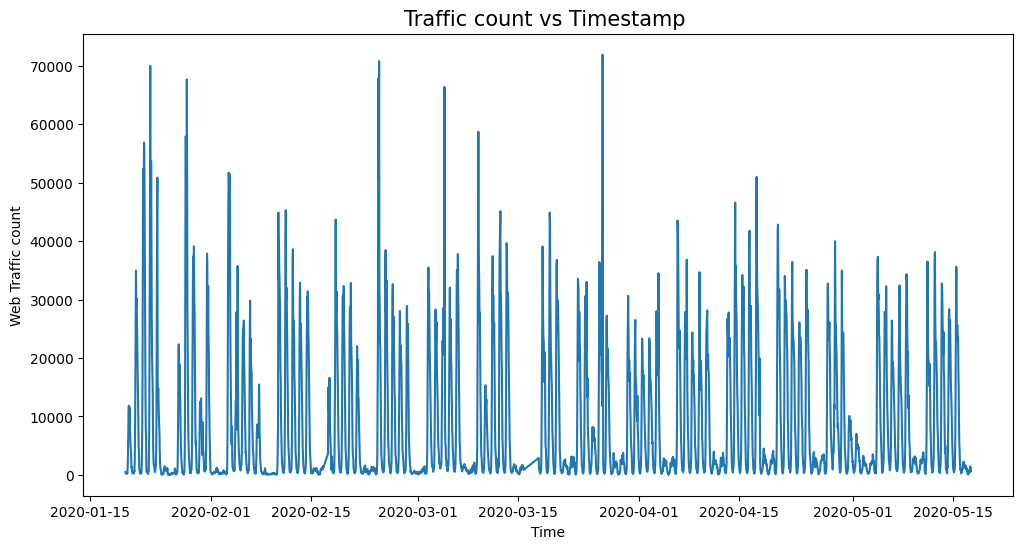

In [443]:
import matplotlib.pyplot as plt 

figure =plt.figure(figsize =(12,6))

plt.plot(traffic['TrafficCount'])

plt.xlabel('Time')
plt.ylabel('Web Traffic count')
plt.title('Traffic count vs Timestamp ',fontsize =15)
plt.show()

### Resampling the time series data : 

In [438]:
web_traffic = traffic.resample('D').sum()

#### Decomposition : 
- . 	Decomposing the time series into its trend, seasonal, and residual components using seasonal decompose method 

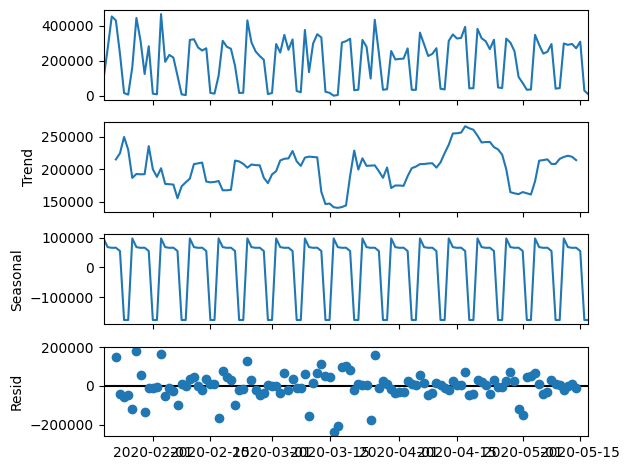

In [377]:
from statsmodels.tsa.seasonal import seasonal_decompose 


# creating decompose object
decompose =seasonal_decompose(web_traffic,model='additive')

# diffinig trend ,seasonality ,residuals
Trend =decompose.trend
Seasonal = decompose.seasonal
Residual =decompose.resid

# plotting Trend ,seasonality ,Residual togather  
decompose.plot()
plt.show()

##### c.	Ploting the decomposed components (trend, seasonality, residual) separately and interpret the observed patterns. Identify any apparent trends, seasonality, or irregular fluctuations.


#### Trend

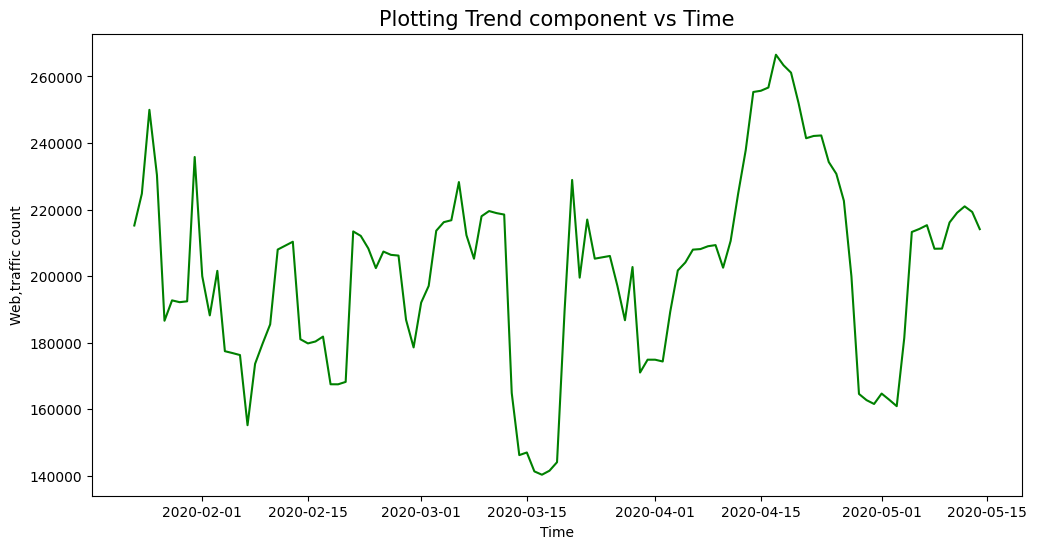

In [378]:
# Creating figure
figure  = plt.figure(figsize=(12,6))

plt.plot(Trend,c ='green')
plt.xlabel('Time')
plt.ylabel('Web,traffic count')
plt.title('Plotting Trend component vs Time',fontsize =15)
plt.show()

#### Seasonal 

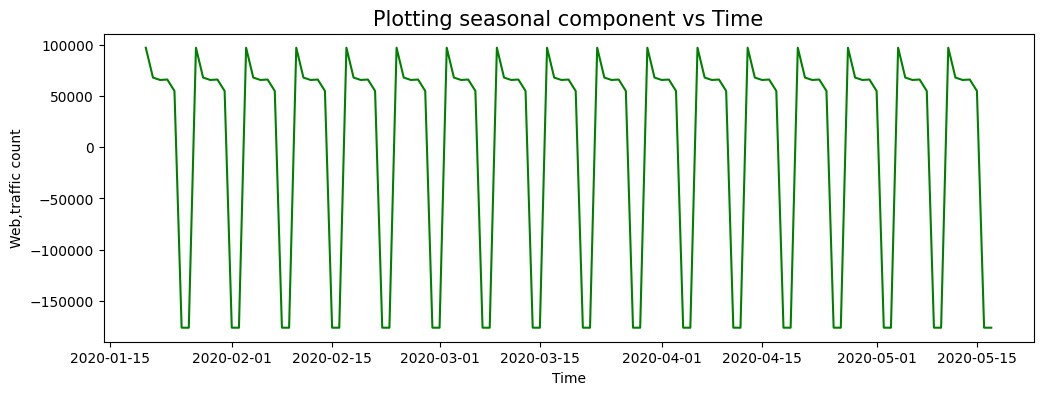

In [379]:
# Creating figure
figure  = plt.figure(figsize=(12,4))

# plotting Seasonal part of data
plt.plot(Seasonal,c ='green')
plt.xlabel('Time')
plt.ylabel('Web,traffic count')
plt.title('Plotting seasonal component vs Time',fontsize =15)
plt.show()

#### Residuals

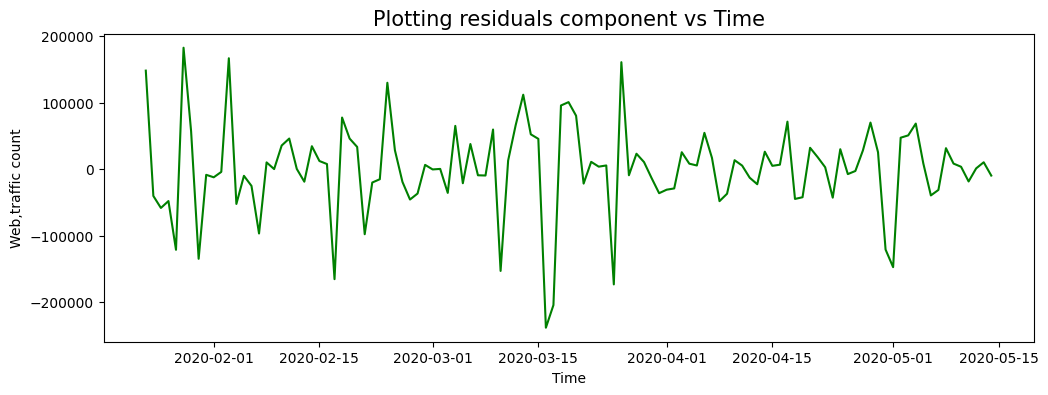

In [380]:
# Creating figure
figure  = plt.figure(figsize=(12,4))

# plotting Residual part of data
plt.plot(Residual,c ='green')
plt.xlabel('Time')
plt.ylabel('Web,traffic count')
plt.title('Plotting residuals component vs Time',fontsize =15)
plt.show()

### Interpretation :
##### Observed (Top plot):
- Original data shows cyclical spikes and  repettitive behaviour ,suggesting seasonality.
##### Trend : 
- Trend component shows gradual rise and fall over time .So no specific trend has been  shown .
##### Seasonality : 
- The seasonal component shows  a repeating pattern most likely weekly . So there is  strong seasonal effect .
##### Residual : 
- Residuals are randomely scatterd around zero .
- There are irregular fluctuation may be due to random noise . but data is around zero shows good decmposition .


## 4.	Stationarity Check:
##### a>	Explain the concept of stationarity in time series analysis and its importance for modeling.


#### a- explanation:
- Stationarity means that statistical property of a time series that do not chang over time . 
- Stationary timeseries : Constant mean,varience and autocorelation ,No clear trend and seasonality  
- NonStationary timeseries : changing mean,varience and autocorelation ,May have trend ,seasonality

#### b -> Dickey-Fuller (ADF) test ::

#### c -> State Hypotheses : 

##### Null Hypotheses(H0) -> Web_traffic dataset is Non Stationary.
##### Alternate Hypotheses(H1) -> Web_traffic dataset is  Stationary.

#### d-  P-value,test statistic 

##### Dickey-Fuller (ADF) test for Original data 

In [426]:
# import adfullar 
from statsmodels.tsa.stattools import adfuller 
#creating object
result_original = adfuller(traffic,autolag='AIC')
result_original
original_pvalue = result_original[0]

#### Dickey-Fuller (ADF) test for resampled data

In [459]:
# import adfullar 
from statsmodels.tsa.stattools import adfuller 
#creating object
result = adfuller(web_traffic,autolag='AIC')
result

(np.float64(-2.4187610848676218),
 np.float64(0.13651109271043288),
 13,
 105,
 {'1%': np.float64(-3.4942202045135513),
  '5%': np.float64(-2.889485291005291),
  '10%': np.float64(-2.5816762131519275)},
 np.float64(2707.5148025670014))

In [384]:
# finding values
test_statistics =result[0]
p_value =result[1]
lags =result[2]
critical_value =result[4]
alpha =0.05 #(asume leval of significance)

In [435]:
from statsmodels.tsa.stattools import adfuller 
#creating object
result_diff = adfuller(web_traffic.diff().dropna(),autolag='AIC')
result_diff

(np.float64(-5.608702381644832),
 np.float64(1.217409829589532e-06),
 12,
 105,
 {'1%': np.float64(-3.4942202045135513),
  '5%': np.float64(-2.889485291005291),
  '10%': np.float64(-2.5816762131519275)},
 np.float64(2676.609115439656))

In [385]:
#### comparing  p_value with leval of significance 
if p_value <alpha : 
    print("Null Hypotheses is rejected")
    print("web_traffic dataset is Stationary")
else:
     print(" Failed to reject Null Hypotheses ")
     print("web_traffic dataset is Non Stationary")
    

 Failed to reject Null Hypotheses 
web_traffic dataset is Non Stationary


## 3.	Autocorrelation Analysis:
##### Ploting  the Autocorrelation Function (ACF) of the 'TrafficCount’ series.


#### ACF plot and Pacf plot

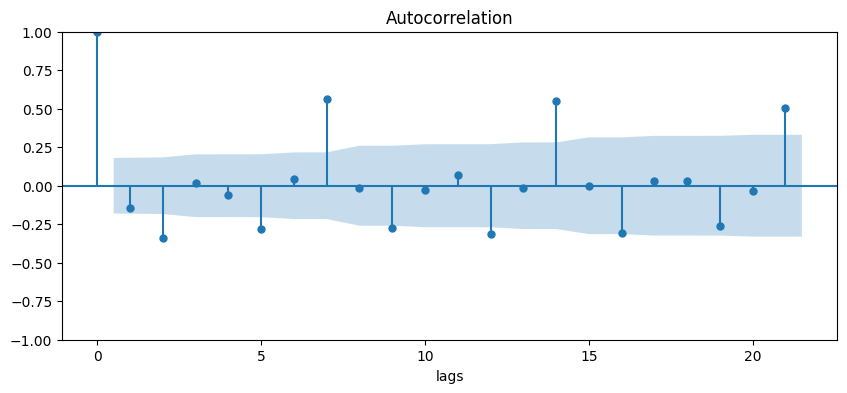

In [446]:
# import plot_acf 
from statsmodels.graphics.tsaplots import plot_acf
fig,ax =plt.subplots(figsize=(10,4))
# plotiing pacf
plot_acf(web_traffic.diff().dropna(),ax =ax)
plt.xlabel('lags')
plt.show()


##### -	Plot the Partial Autocorrelation Function (PACF) of the 'TrafficCount' time series.


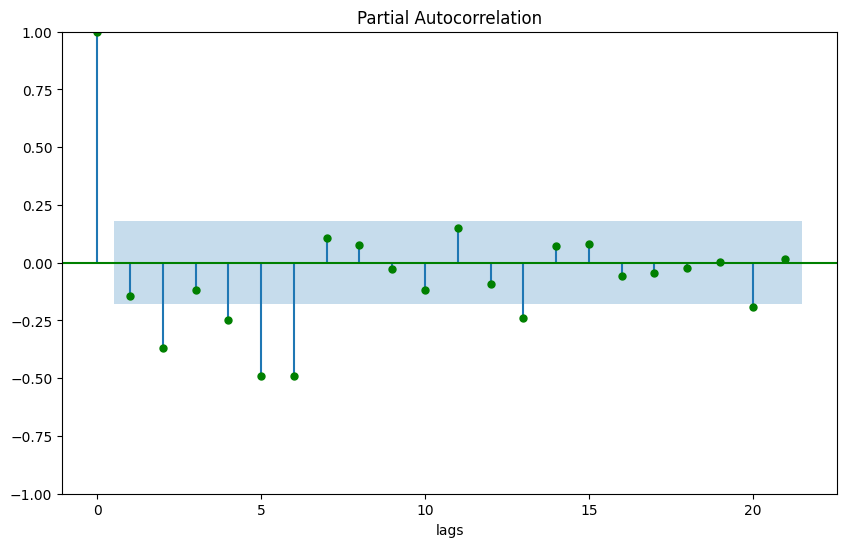

In [447]:
# import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf
fig,ax =plt.subplots(figsize=(10,6))
# plotiing pacf
plot_pacf(web_traffic.diff().dropna(),ax =ax,c ='g')
plt.xlabel('lags')
plt.show()


####	 Analyze the ACF and PACF plots to identify potential autoregressive (AR) and moving average (MA) components in the time series.
##### ACF ->
- High correlation at lag1 shows momentum in the time series .
- The decay suggests a Moving average component .
- q =0
##### PACF ->
- The PACF spikes at lag1 is High suggest a strong Auto regressive  of order 1
- p =0

## key points ->
#### Hence  differencing required for resample data but for original data no resampling required.
#### After differencing  of resampled data p_value is less than alpha so now data is stationary .
#### for original data d =0 
#### for resample data d =1

### Phase 2: SARIMA Model Building and Evaluation 

#### 5.	SARIMA Model Identification:
-	Based on the analysis of the ACF and PACF plots (from Phase 1) and the stationarity analysis (including the order of differencing), determine the initial values for the SARIMA model parameters:
	

In [449]:
# SARIMA MODEL PARAMETRES

# Non Seasonal parametrs 

p =  0        # (autoregressive order)
d = 1         #(differencing order) 
q = 0           # (moving average order)

# Seasonal parametrs 
P = 1        #(seasonal autoregressive order)
D = 0       #(seasonal differencing order)
Q =  1      #(seasonal moving average order)
s =   7     # (seasonal period) - Determine the seasonality ( weekly).

#### 6.	Model Training and Selection:
-	Split the time series data into training and testing sets. A common split is 80% for training and 20% for testing but justify your choice. Ensure the split maintains the time series order.
-	Train several SARIMA models with different combinations of the parameters (p, d, q, P, D, Q, s) identified in the previous step. You can use a grid search or iterative approach to explore different parameter combinations.
-	For each trained model, record the AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) value.
-	Select the SARIMA model with the lowest AIC or BIC value as the best model. Justify your model selection based on the information criterion used. Explain the trade-off between model fit and complexity that AIC/BIC balances.


#### Splitting time series data into training(80%) and testing(20%)

In [387]:
from sklearn.model_selection import train_test_split 
X_train, X_test = train_test_split(web_traffic,test_size= 0.2,shuffle=False)
print('Shape of training data : ',X_train.shape)
print('Shape of test data : ',X_test.shape)

Shape of training data :  (95, 1)
Shape of test data :  (24, 1)


In [388]:
X_train

,TrafficCount
Timestamp,
2020-01-20,95746.0
2020-01-21,267521.0
2020-01-22,452541.0
2020-01-23,429927.0
2020-01-24,239579.0
...,...
2020-04-19,42479.0
2020-04-20,381563.0
2020-04-21,327789.0


#### Model Building Using SARIMA andtrying to get Best Parameters for model

In [464]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Iterating over parameters
rmse = []
params = []
for p in range(2):
    for d in range(2):
        for q in range(2):
            for P in range(2):
                for D in range(2):
                    for Q in range(2):             
                       
                            model = SARIMAX(X_train
                                            ,order=(p, d, q), 
                                            seasonal_order=(P, D, Q, 7), 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)
                            model_fit = model.fit(disp=False)                            
                            rmse.append(np.sqrt(mean_squared_error(X_test, 
                                                np.round(model_fit.forecast(len(X_test))))))
                            params.append(((p, d, q), (P, D, Q)))
                        
                        


In [465]:
# Storing RMSE and parameters and sorting the dataframe based on RMSE in ascending order
res = pd.DataFrame([rmse, params]).T.sort_values([0])
res.columns = ['RMSE', 'Params']
res.head()

,RMSE,Params
51,61053.731808,"((1, 1, 0), (0, 1, 1))"
23,62071.480014,"((0, 1, 0), (1, 1, 1))"
19,62127.678565,"((0, 1, 0), (0, 1, 1))"
55,63090.341034,"((1, 1, 0), (1, 1, 1))"
35,63452.007152,"((1, 0, 0), (0, 1, 1))"


#### 7.	Model Evaluation:
- 	Use the selected SARIMA model to generate predictions on the testing set.
-  	Calculate the following evaluation metrics to assess the model's performance:
    -	Mean Squared Error (MSE)
    - 	Root Mean Squared Error (RMSE)
    -	Mean Absolute Error (MAE)
-	Plot the original time series, the training data, and the predicted values on the testing set in a single plot. Visually assess the model's fit and predictive accuracy.
-	Interpret the evaluation metrics and the plot. Discuss the model's strengths and weaknesses in forecasting web traffic.


### Model building on original time series

In [444]:
original_train = traffic.iloc[:2234]
original_test = traffic.iloc[2234 :]


In [469]:
# Model building
model = SARIMAX(original_train, order=(2, 0, 0), 
                seasonal_order=(1, 1, 1, 24), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit_original = model.fit(disp=False)

forecast_original =model_fit_original.forecast(559)
prediction_orignal = model_fit_original.predict(559)
forecast_original.index = original_test.index

### Visualization of forecasted data and original data(without resampled) 

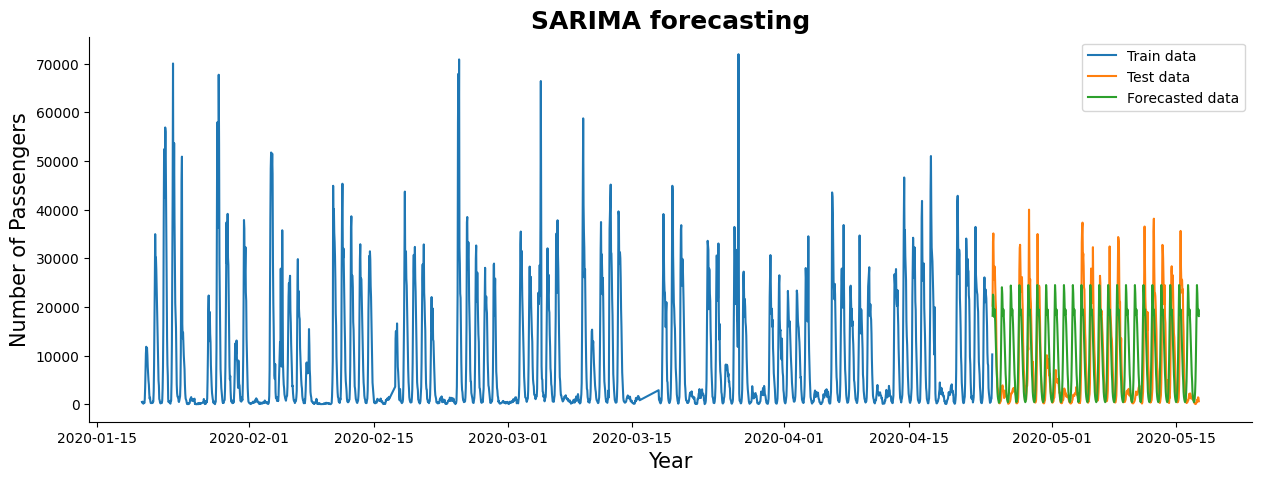

In [470]:
import seaborn as sns 
# Visualization
plt.figure(figsize=(15, 5))
plt.plot(original_train, label='Train data')
plt.plot(original_test, label='Test data')
plt.plot(forecast_original, label='Forecasted data')

plt.legend()
sns.despine()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.title('SARIMA forecasting', fontsize=18, weight='bold')
plt.show()

In [471]:
model_fit_original.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         TrafficCount   No. Observations:                 2234
Model:             SARIMAX(2, 0, 0)x(1, 1, [1], 24)   Log Likelihood              -21446.911
Date:                              Tue, 13 May 2025   AIC                          42903.822
Time:                                      14:44:26   BIC                          42932.267
Sample:                                           0   HQIC                         42914.220
                                             - 2234                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0714      0.011    100.462      0.000       1.050       1.092
ar.L2         -0.2008      0.013    -15.029      0.000      -0.227      -0.175
ar.S.L24       0.2188      0.023      9.509      0.000       0.174       0.264
ma.S.L24      -0.9027      0.014    -63.607      0.000      -0.931      -0.875
sigma2      2.734e+07   2.62e-10   1.04e+17      0.000    2.73e+07    2.73e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):             34487.46
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.18e+32. Standard errors may be unstable.
"""

### Model building on resampled Time series data

In [418]:
# Model building
model = SARIMAX(X_train, order=(2, 1, 5), 
                seasonal_order=(1, 0, 1, 7), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

forecast_value =model_fit.forecast(len(X_test))
predictions=model_fit.predict(len(X_test))

#### Calculating AIC ->

In [450]:
#AIC
AIC  = model_fit.aic
print('AiC : ',AIC)

AiC :  2103.478561694961


In [451]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error 
MSE =np.round(mean_squared_error(X_test,forecast_value))
RMSE =np.round(root_mean_squared_error(X_test,forecast_value))
MAE =np.round(mean_absolute_error(X_test,forecast_value))

print('mean_absolute_error : ',MAE)
print('mean_squared_error : ',  MSE)
print('root_mean_squared_error : ',RMSE )

mean_absolute_error :  52574.0
mean_squared_error :  6310282505.0
root_mean_squared_error :  79437.0


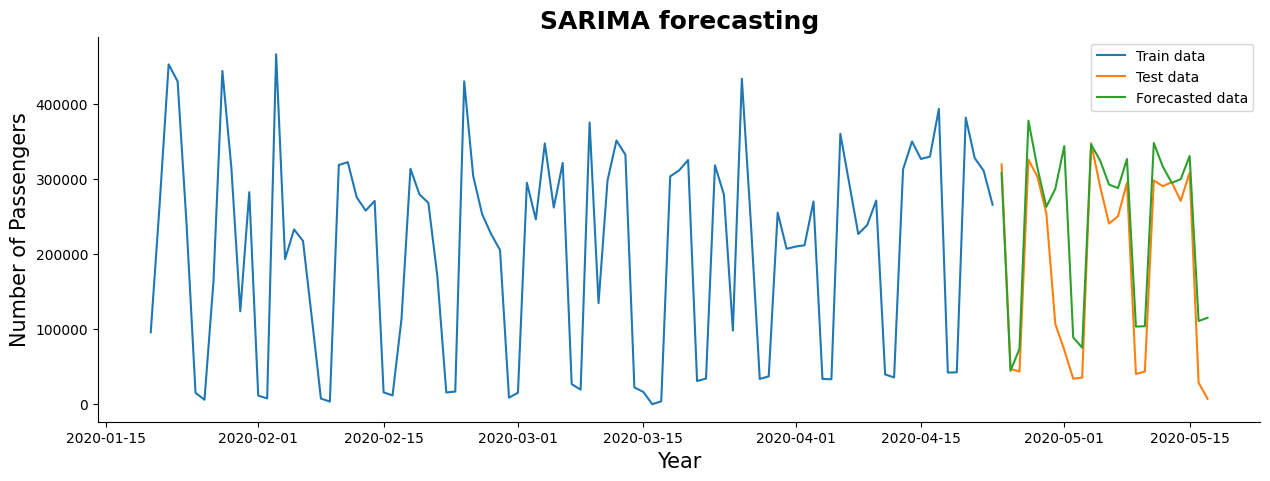

In [421]:
import seaborn as sns 
# Visualization
plt.figure(figsize=(15, 5))
plt.plot(X_train, label='Train data')
plt.plot(X_test, label='Test data')
plt.plot(forecast_value, label='Forecasted data')
#plt.plot(prediction,label = 'prdicted value')
plt.legend()
sns.despine()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.title('SARIMA forecasting', fontsize=18, weight='bold')
plt.show()

In [422]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        TrafficCount   No. Observations:                   95
Model:             SARIMAX(2, 1, 5)x(1, 0, [1], 7)   Log Likelihood               -1041.739
Date:                             Tue, 13 May 2025   AIC                           2103.479
Time:                                     10:10:17   BIC                           2127.423
Sample:                                 01-20-2020   HQIC                          2113.085
                                      - 04-23-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0896      0.201      0.447      0.655      -0.304       0.483
ar.L2         -0.7524      0.160     -4.712      0.000      -1.065      -0.439
ma.L1         -1.0320      0.344     -3.001      0.003      -1.706      -0.358
ma.L2          0.8055      0.460      1.749      0.080      -0.097       1.708
ma.L3         -0.6615      0.489     -1.352      0.176      -1.620       0.297
ma.L4         -0.3683      0.473     -0.778      0.436      -1.296       0.559
ma.L5          0.2204      0.387      0.569      0.569      -0.539       0.980
ar.S.L7        0.9509      0.159      5.973      0.000       0.639       1.263
ma.S.L7       -0.6045      0.250     -2.419      0.016      -1.094      -0.115
sigma2      1.508e+10   3.57e-11   4.23e+20      0.000    1.51e+10    1.51e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 4.73
Prob(Q):                              0.80   Prob(JB):                         0.09
Heteroskedasticity (H):               0.44   Skew:                            -0.04
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.52e+37. Standard errors may be unstable.
"""

## Conclusion :
### After seeing forecasting and visualization  of both models we can conclude that model build on resample data is giving good forecasting result with respect to original data .
Here Original data is stationory but resample data was not stationary .
Heteroskedasticity value for original model is grater than the resample data model so it is also indication of resample data model is good predictor.

#### 8.	Residual Analysis :
-	Calculate the residuals (the difference between the actual and predicted values) from the selected SARIMA model on the training data.
-	Plot the residuals over time.
-	Create a histogram or density plot of the residuals.
-	Plot the ACF and PACF of the residuals.
-	Perform the Ljung-Box test to check if the residuals are white noise (i.e., randomly distributed with no autocorrelation).
-	Interpret the results of the residual analysis. Discuss whether the residuals exhibit any patterns or autocorrelation, which would indicate that the model is not capturing all the information in the time series.


In [285]:
prediction = pd.DataFrame(forecast_value)
prediction
X_test

,TrafficCount
Timestamp,
2020-04-24,319469.0
2020-04-25,46968.0
2020-04-26,43531.0
2020-04-27,325658.0
2020-04-28,303019.0
2020-04-29,254135.0
2020-04-30,106821.0
2020-05-01,72296.0
2020-05-02,33957.0


In [296]:
residuals = X_test['TrafficCount']-forecast_value
residuals

Timestamp
2020-04-24     11922.627284
2020-04-25      2457.723207
2020-04-26    -30283.211312
2020-04-27    -51972.156313
2020-04-28    -11878.750801
2020-04-29     -8738.044796
2020-04-30   -179919.919952
2020-05-01   -271446.273810
2020-05-02    -54910.066848
2020-05-03    -39892.200879
2020-05-04      1713.685912
2020-05-05    -34518.858655
2020-05-06    -51964.501696
2020-05-07    -37436.909617
2020-05-08    -31522.949016
2020-05-09    -63022.803254
2020-05-10    -60505.541435
2020-05-11    -49843.807956
2020-05-12    -26036.798324
2020-05-13       723.231643
2020-05-14    -28846.500474
2020-05-15    -22133.037037
2020-05-16    -82243.563295
2020-05-17   -107845.004568
Freq: D, dtype: float64

In [457]:
# residual  for original Model 
residuals_org =original_test['TrafficCount']-forecast_original
residuals_org


Timestamp
2020-04-24 09:30:00     2085.610602
2020-04-24 10:30:00    10888.491875
2020-04-24 11:30:00    12963.446617
2020-04-24 12:30:00     9092.335802
2020-04-24 13:30:00     7694.070614
                           ...     
2020-05-17 08:30:00   -22327.365825
2020-05-17 09:30:00   -18832.823454
2020-05-17 10:30:00   -16899.838151
2020-05-17 11:30:00   -18151.975321
2020-05-17 12:30:00   -17503.373578
Length: 559, dtype: float64

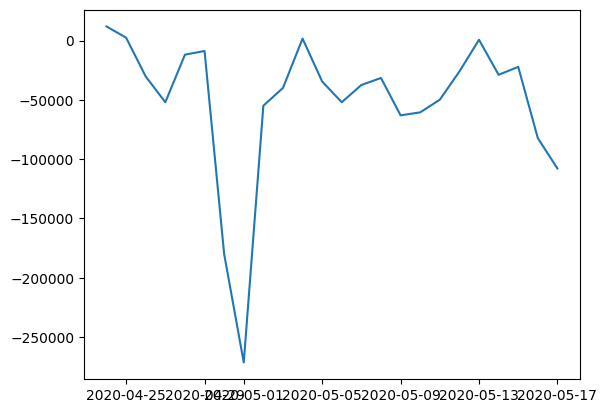

In [298]:
plt.plot(residuals)

### primary purpose of plot_diagnostics() is to generate diagnostic plots of the residuals (the differences between observed and predicted values) from a fitted model.

#### Original data model -

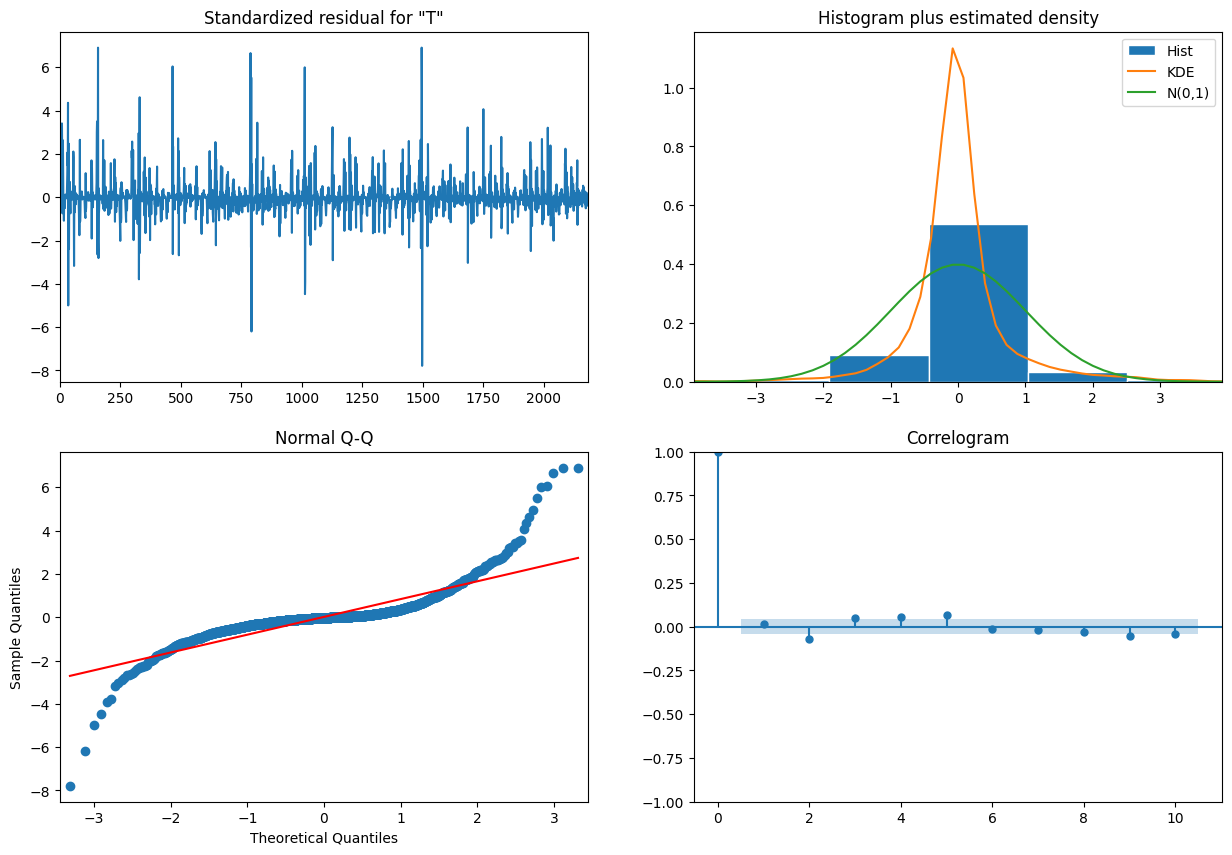

In [472]:
# Dianostic plot 
model_fit_original.plot_diagnostics(figsize =(15,10))
plt.show()

#### Reshaped data Model -

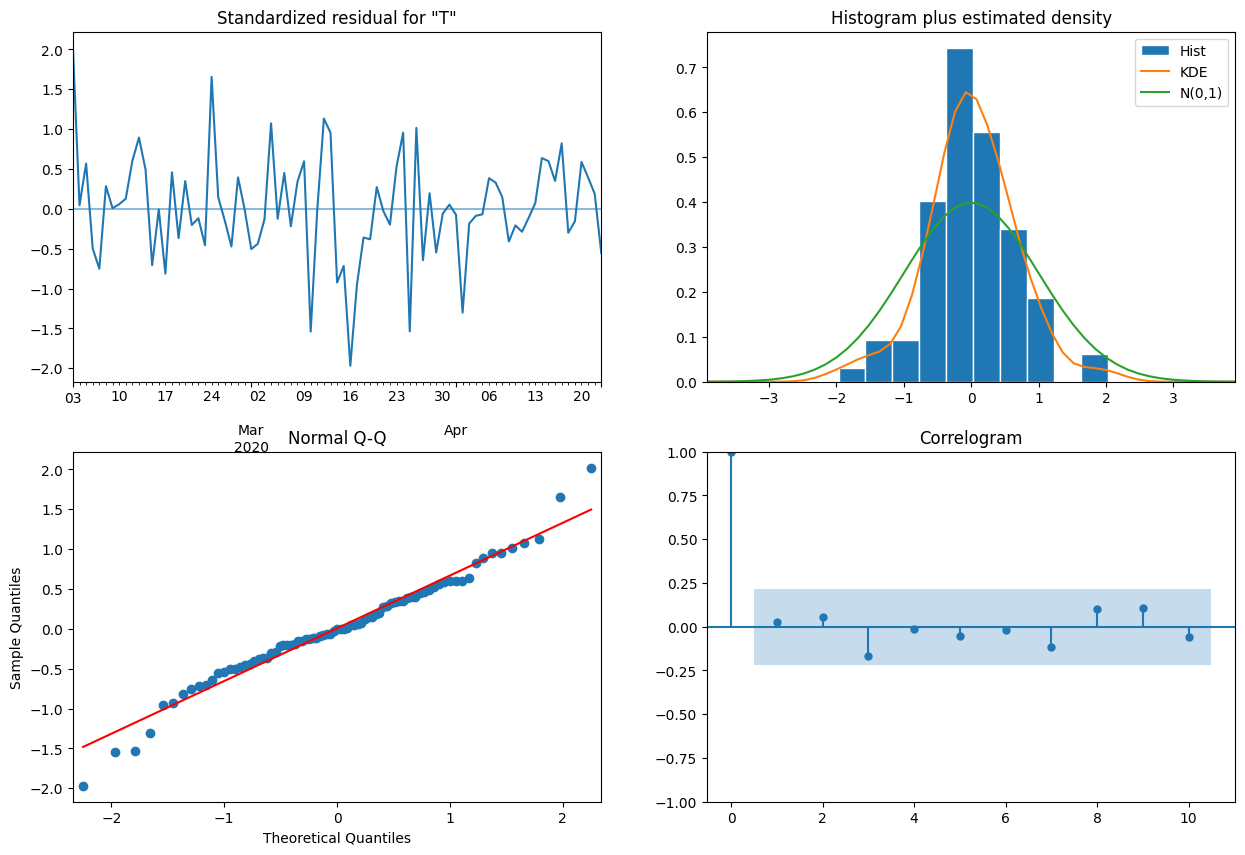

In [299]:
model_fit.plot_diagnostics(figsize =(15,10))
plt.show()

<Axes: xlabel='None', ylabel='Density'>

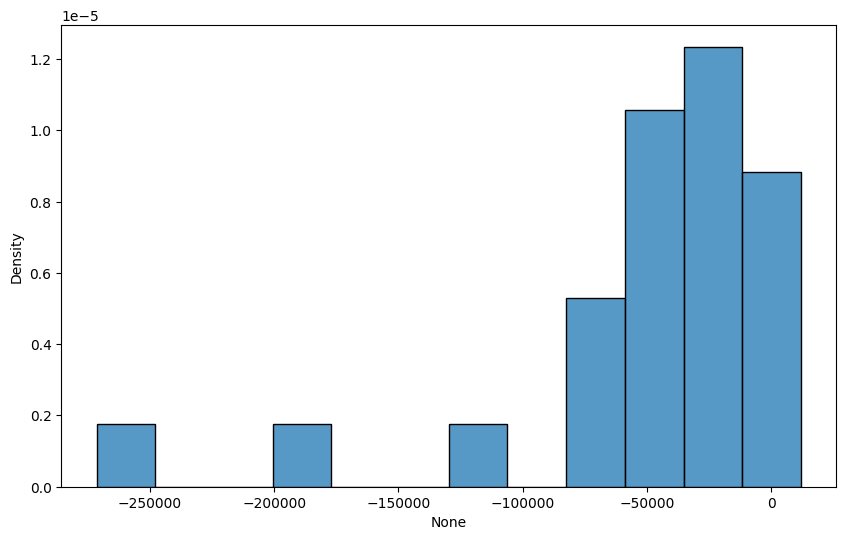

In [300]:
figure = plt.figure(figsize =(10,6))
import seaborn as sns 
sns.histplot(x =residuals ,stat='density')

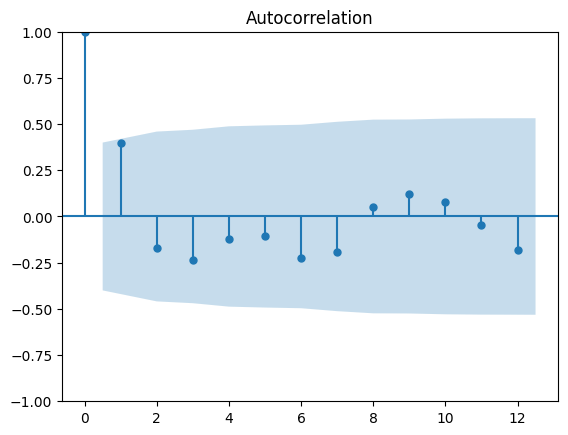

In [301]:
# plotting acf model 
plot_acf(residuals)
plt.show()

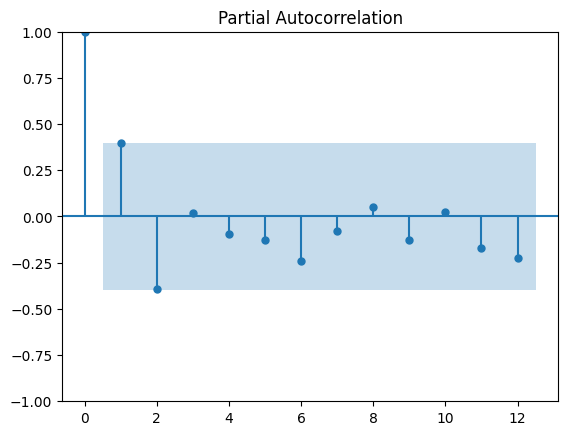

In [302]:
# plotting pacf_model 
plot_pacf(residuals)
plt.show()

### Ljung-Box test : 
- It is a statistical test used to check whether a time series exhibits autocorrelation at multiple lags. It helps determine if the residuals of a time series model are independently distributed

#### Null Hypotheses(H0) : Residuals are independentely distributed (no autocorrelation)

#### Alternate Hypotheses(H1) : Residuals are not independently distributed

In [303]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljungbox_test = acorr_ljungbox(residuals)
ljungbox_test

,lb_stat,lb_pvalue
1,4.329357,0.037460
2,5.140717,0.076508
3,6.791032,0.078865
4,7.262503,0.122650


#### Interpretation :
- p-value is greater than the significance level , you fail to reject the null hypothesis
-  This indicates that there is not enough evidence to suggest autocorrelation in the residuals.
   
- The residuals can be considered independent, which is desirable for a well-fitting model.
- There is no significant evidence that indicates your model’s residuals violate the assumption of independence, supporting the model's validity in terms of the residual structure .
- Seeing ACF and PACF plot of residuals also suggest Autocorrelation 

# Phase 3: Conclusion ->


#### Data preprocessing : 
- After reading data, Convert type of  date  column  to date -time .
-  Then checked for null values and there is no null value present .
-  Resample the data on daily frequency to see clear patterns .
- Visualization of data and after decomposition we clearly saw seasonality .and there is no specific trend .
#### Auto Correlation and Stationary Checks :  
- ACF and PACF  plot shows that momentum and regression are present in Time series data .
- Original data is Stationary and but resample data is not stationary so did differencing  for time series data .
#### Model Building : 
- Model building done on original data  and  resample data  .
- Visualisation of predicted value shows that model build on resample data is better than the model build on original data .
- Observing Model summary Heteroskedasticity value for original model is grater than the resample data model so it is also indication of resample data model is good predictor.
#### Residual Analysis : 
- Residual Analysis done by visualisation of residual and Ljung-Box test both shows that model is a fit model since p_value is over 0.05 .
- Diagnostics plot show that for original data it is not good as it is for reshaped data .